# Exploratory Data Analysis

In [34]:
import os 
import glob 
import time
import PIL
import json 

import numpy as np 
import pandas as pd 
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500
import matplotlib.pyplot as plt 
%matplotlib inline

from rich import inspect

locs = ['workstation','mac']

loc = 'workstation'


In [35]:
dataset_path = None

if loc == 'mac' :
    dataset_path = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/cleanf3_interpretation'
    
if loc == "workstation" : 
    dataset_path = '/local1/workspace/adl_seismic/data/interpretation'

print('Dataset Path is a directory ? :',os.path.isdir(dataset_path))

folder_structure = list(os.walk(dataset_path))
# print(folder_structure)

inlines_dir = os.path.join(dataset_path, 'inlines')
xlines_dir = os.path.join(dataset_path, 'crosslines')
horizons_dir = os.path.join(dataset_path, 'horizons')
masks_dir = os.path.join(dataset_path, 'masks')
inline_patches_dir = os.path.join(dataset_path, 'tiles_inlines')
xline_patches_dir = os.path.join(dataset_path, 'tiles_crosslines')

Dataset Path is a directory ? : True


In [36]:
def extract_line_no(path) : 
    return int(path.split('/')[-1].split('.')[0].split('_')[-1])

def extract_mask_info(path) : 
    file_name = path.split('/')[-1].split('.')[0]
    line_type = 'xline' if file_name.split('_')[0] == 'crossline' else 'inline'
    line_no = int(file_name.split('_')[1])
    return line_type, line_no

def derive_mask_path(mask_dir, line_type, line_no ) : 
    return os.path.join(mask_dir, '_'.join([line_type, str(line_no),'mask']) + '.png'  )

def derive_line_path(lines_dir, line_type, line_no ) : 
    return os.path.join(lines_dir, '_'.join([line_type, str(line_no)]) + '.tiff'  )

In [37]:
inline_image_paths = sorted(glob.glob(inlines_dir + '/*'), key = lambda path : extract_line_no(path))
xline_image_paths = sorted(glob.glob(xlines_dir + '/*'), key = lambda path : extract_line_no(path))

# horizon_paths = sorted(glob.glob(horizons_dir + '/*'))
mask_paths = sorted(glob.glob(masks_dir + '/*'))

In [38]:
# path samples 
print(inline_image_paths[0])
print(xline_image_paths[0])
# print(horizon_paths[0])
print(mask_paths[0])

/local1/workspace/adl_seismic/data/interpretation/inlines/inline_100.tiff
/local1/workspace/adl_seismic/data/interpretation/crosslines/crossline_300.tiff
/local1/workspace/adl_seismic/data/interpretation/masks/crossline_1000_mask.png


========================ILINES========================
IL START : 100, IL END : 750 -- TOTAL INLINES : 651


/tmp/ipykernel_75228/2253622215.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


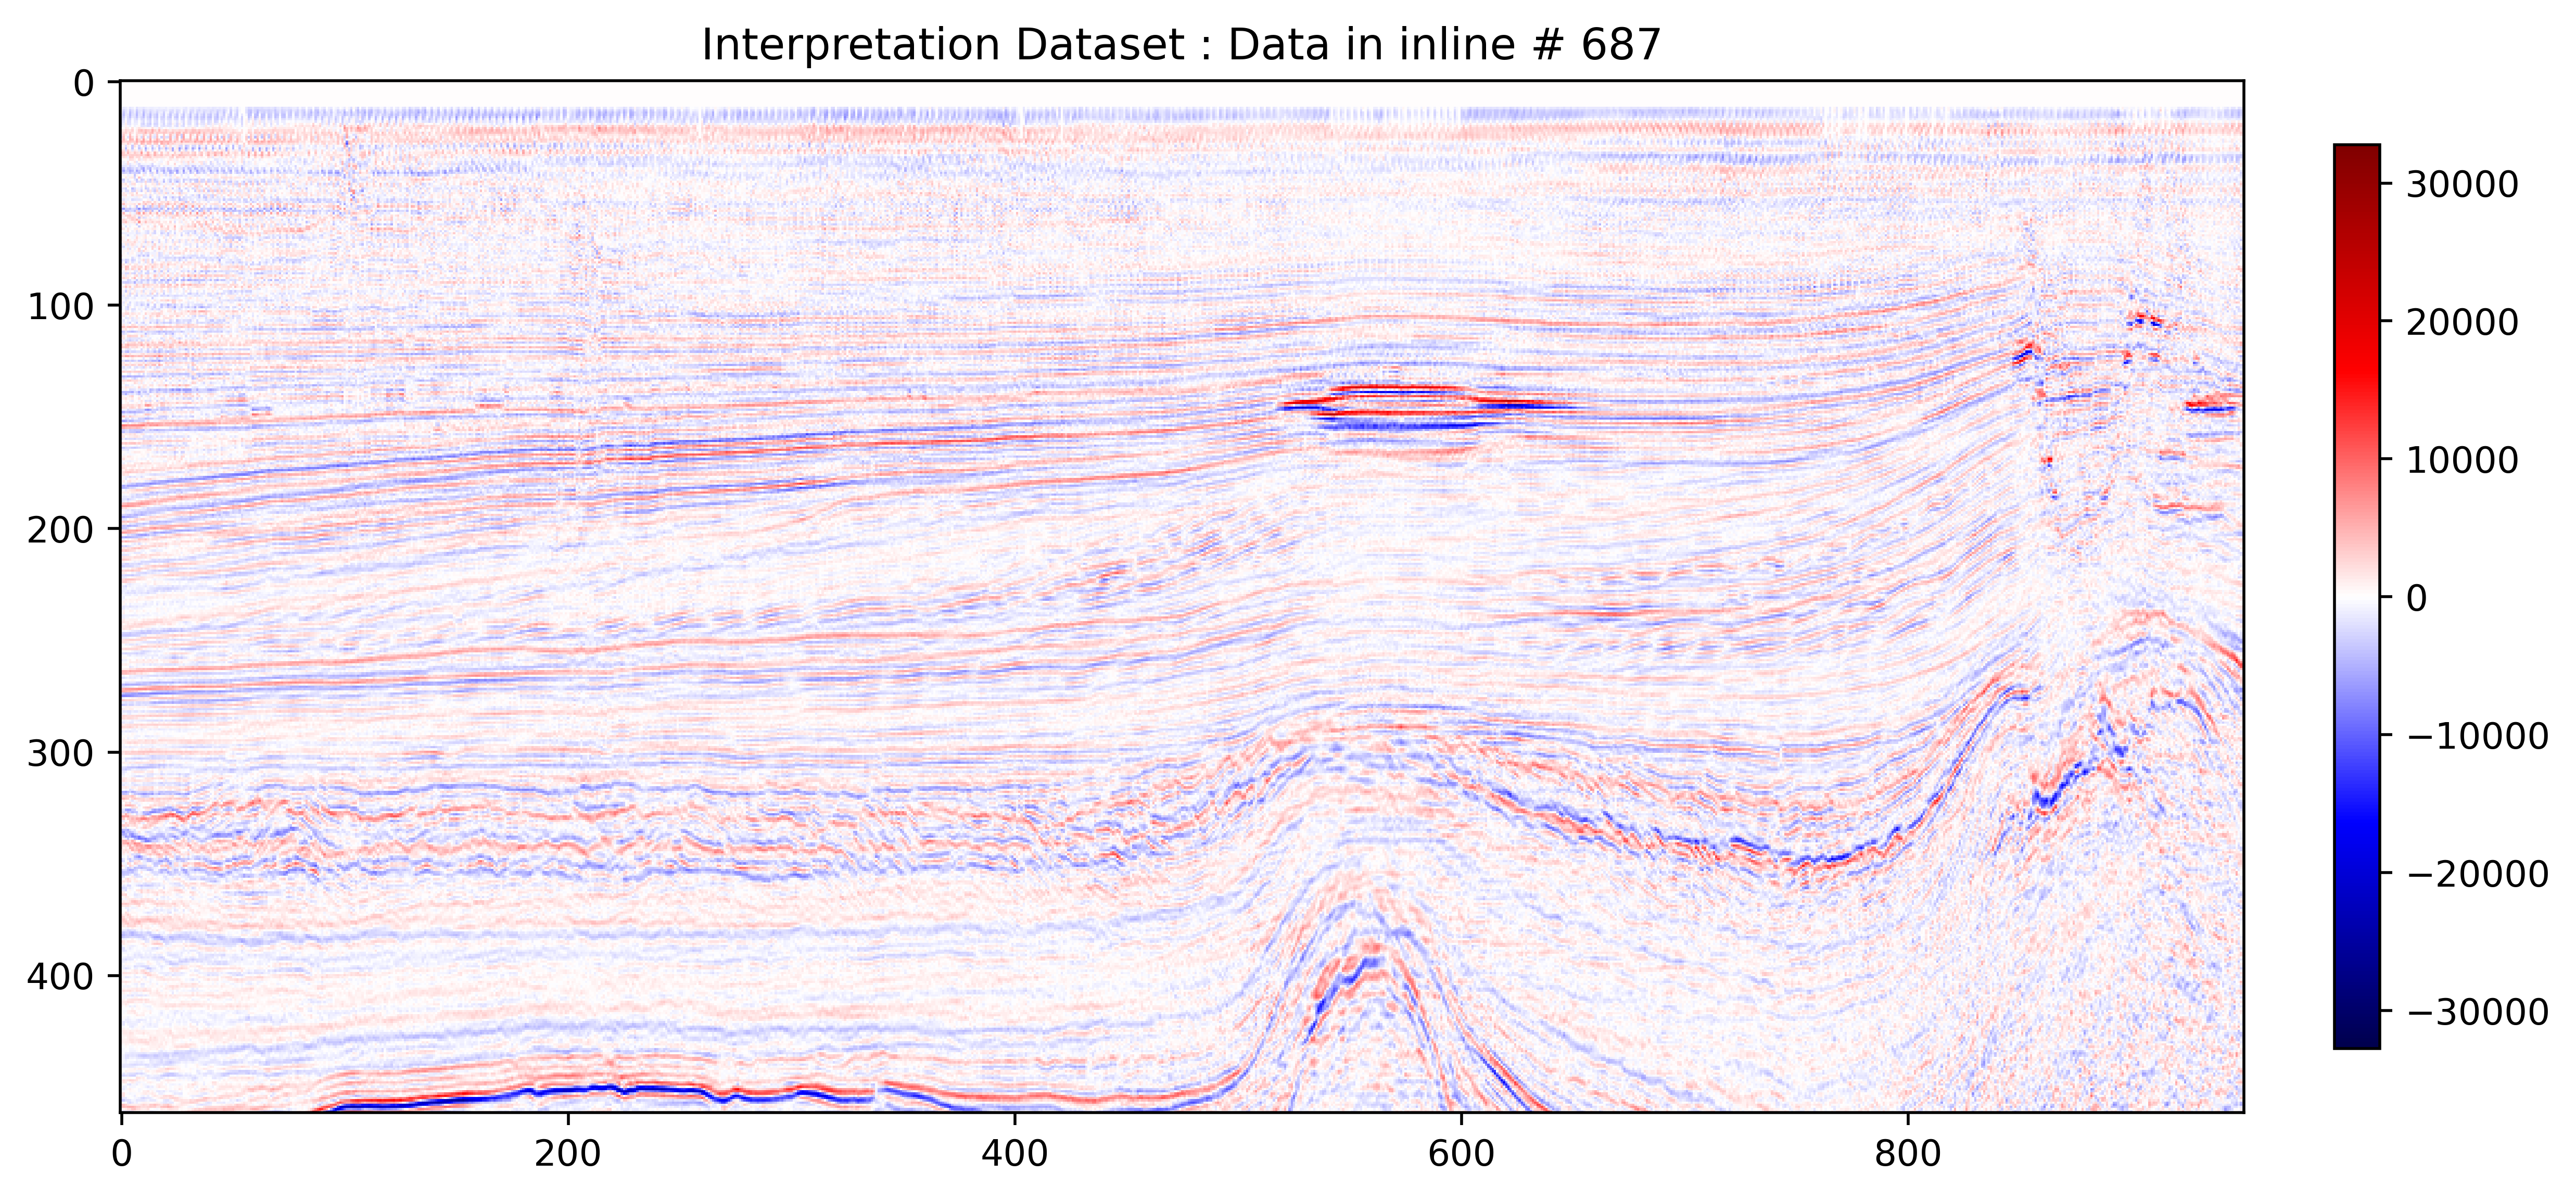

Image Shape (H x W) : 462 X 462
Min Amplitude : -25970.0, Max Amplitude : 24895.0


/tmp/ipykernel_75228/2253622215.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


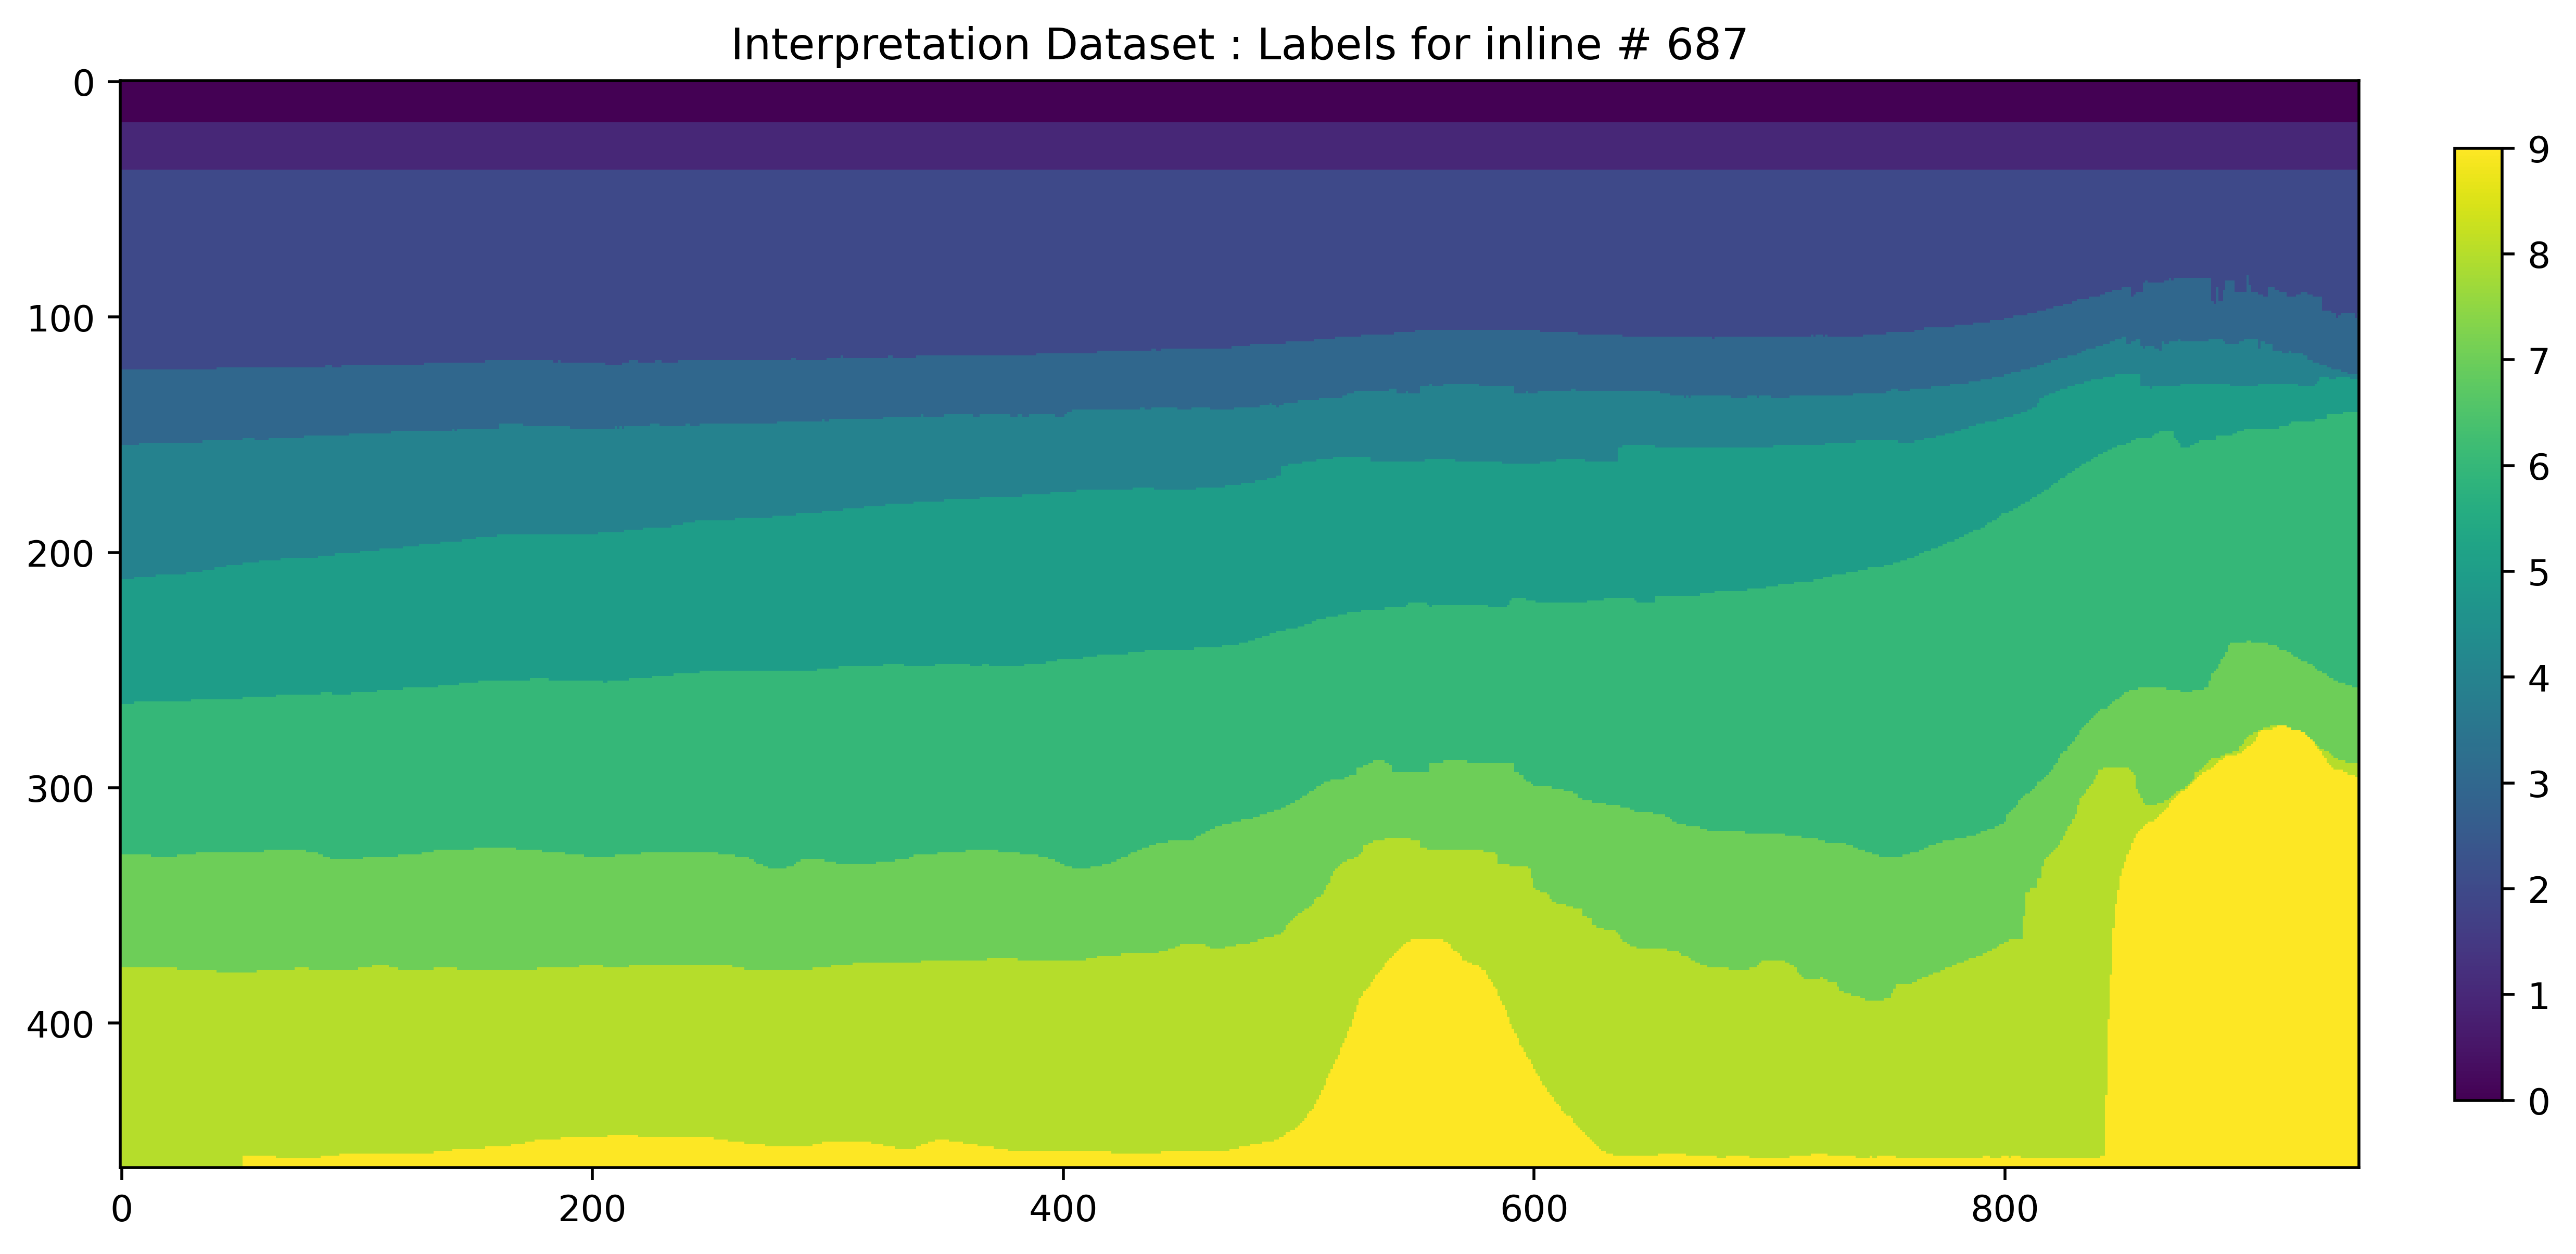

Mask Shape (H x W) : 462 X 951


In [39]:
# Summary Statistics 
import imageio

def plot_line(paths, line_type, index, twt_start=None, twt_end=None, xline_start = None, xline_end=None, figsize=None) : 

    path = derive_line_path(paths, line_type, index)
    title = f"Interpretation Dataset : Data in {line_type} # {index}"
    img = imageio.imread(path)
    img = np.array(img)

    if figsize : 
        fig = plt.figure(figsize=figsize)
    else : 
        fig = plt.figure(figsize=(10,60))
    plt.title(title)
    
    img_plot = img
    if twt_start and twt_end : 
        img_plot = img_plot[twt_start:twt_end, :]
    if xline_start and xline_end : 
        img_plot = img_plot[:, xline_start:xline_end]
    # img  = img / 32767
    plt.imshow(img_plot, cmap='seismic', vmin = -32767, vmax = 32767)
    # plt.axis('off')
    plt.colorbar(fraction=0.020, pad=0.04)
    plt.tight_layout()
    plt.show()
    
    print(f"Image Shape (H x W) : {img.shape[0]} X {img.shape[0]}")
    print(f"Min Amplitude : {np.min(img)}, Max Amplitude : {np.max(img)}")

def plot_mask(masks_dir,line_type,index, twt_start=None, twt_end=None, xline_start = None, xline_end=None, figsize=None ) : 
    path = derive_mask_path(masks_dir, line_type, index ) 
    if figsize : 
        fig = plt.figure(figsize=figsize)
    else : 
        fig = plt.figure(figsize=(10,60))
    img = imageio.imread(path)
    img = np.array(img)
    # img = np.flip(img, axis = -1)
    # plt.axis('off')
    title = f"Interpretation Dataset : Labels for {line_type} # {index}"
    plt.title(title)
    
    img_plot = img
    if twt_start and twt_end : 
        img_plot = img_plot[twt_start:twt_end, :]
    if xline_start and xline_end : 
        img_plot = img_plot[:, xline_start:xline_end]
    
    plt.imshow(img_plot)
    plt.colorbar(fraction=0.020, pad=0.04)
    plt.tight_layout()
    plt.show()
    print(f"Mask Shape (H x W) : {img.shape[0]} X {img.shape[1]}")

n_inline , min_inline, max_inline = len(inline_image_paths) , extract_line_no(inline_image_paths[0]) , extract_line_no(inline_image_paths[-1])


n_xline , min_xline, max_xline = len(xline_image_paths) , extract_line_no(xline_image_paths[0]) , extract_line_no(xline_image_paths[-1])


# n_horizons = len(horizon_paths)

n_masks = len(mask_paths)

print("========================ILINES========================")
print(f"IL START : {min_inline}, IL END : {max_inline} -- TOTAL INLINES : {n_inline}")

random_inline_no = np.random.randint(min_inline,max_inline)
plot_line(inlines_dir,'inline', random_inline_no )
plot_mask(masks_dir,'inline', random_inline_no )



/tmp/ipykernel_75228/2253622215.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


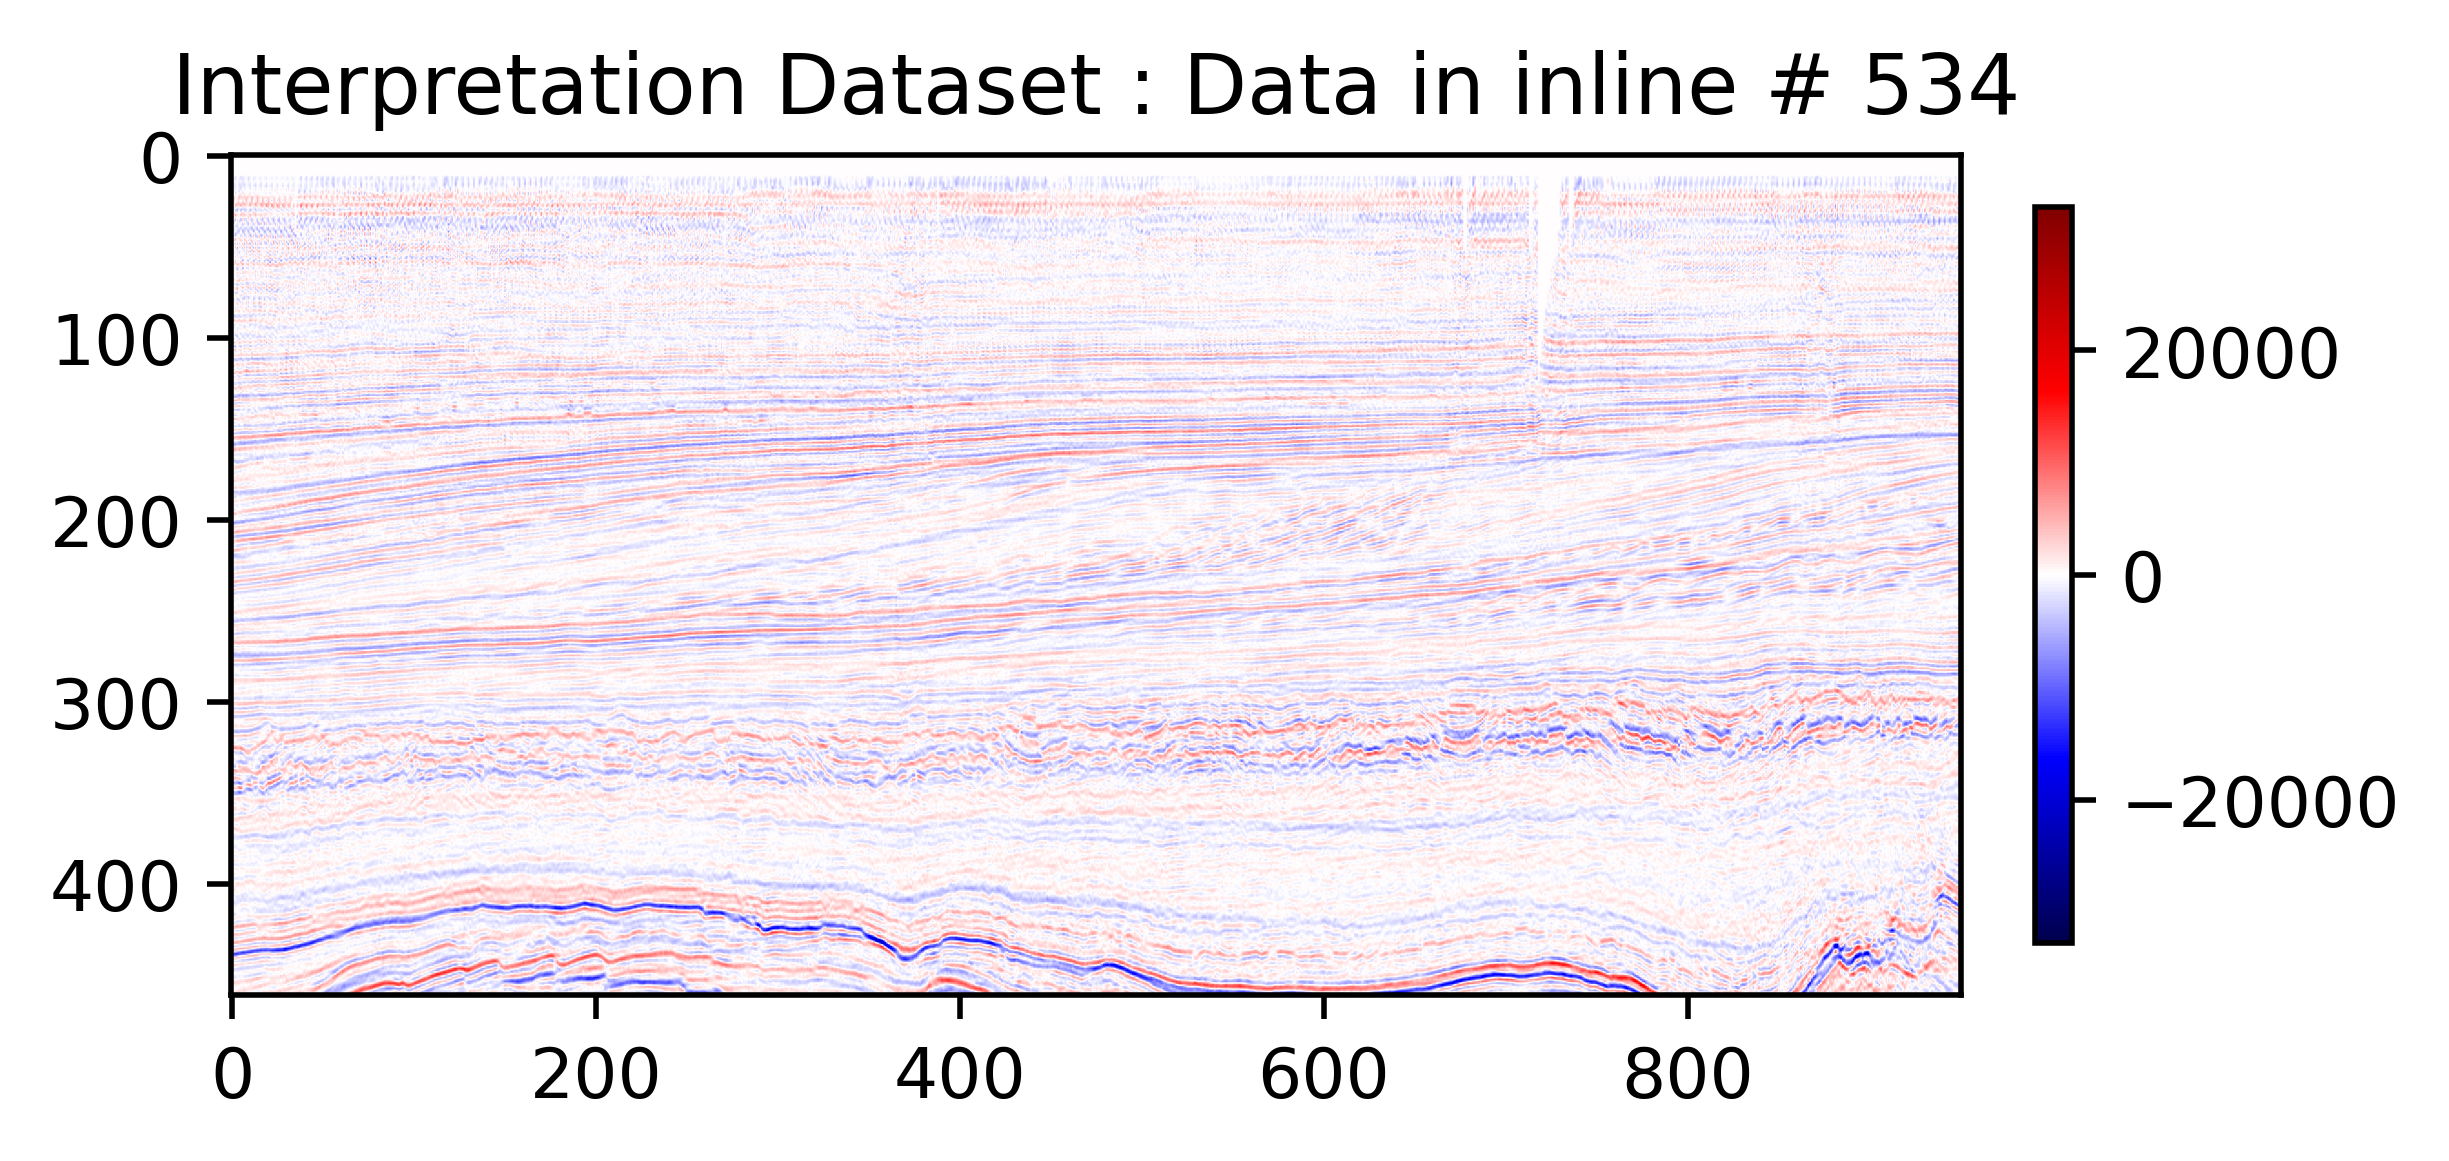

Image Shape (H x W) : 462 X 462
Min Amplitude : -25527.0, Max Amplitude : 18530.0


/tmp/ipykernel_75228/2253622215.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


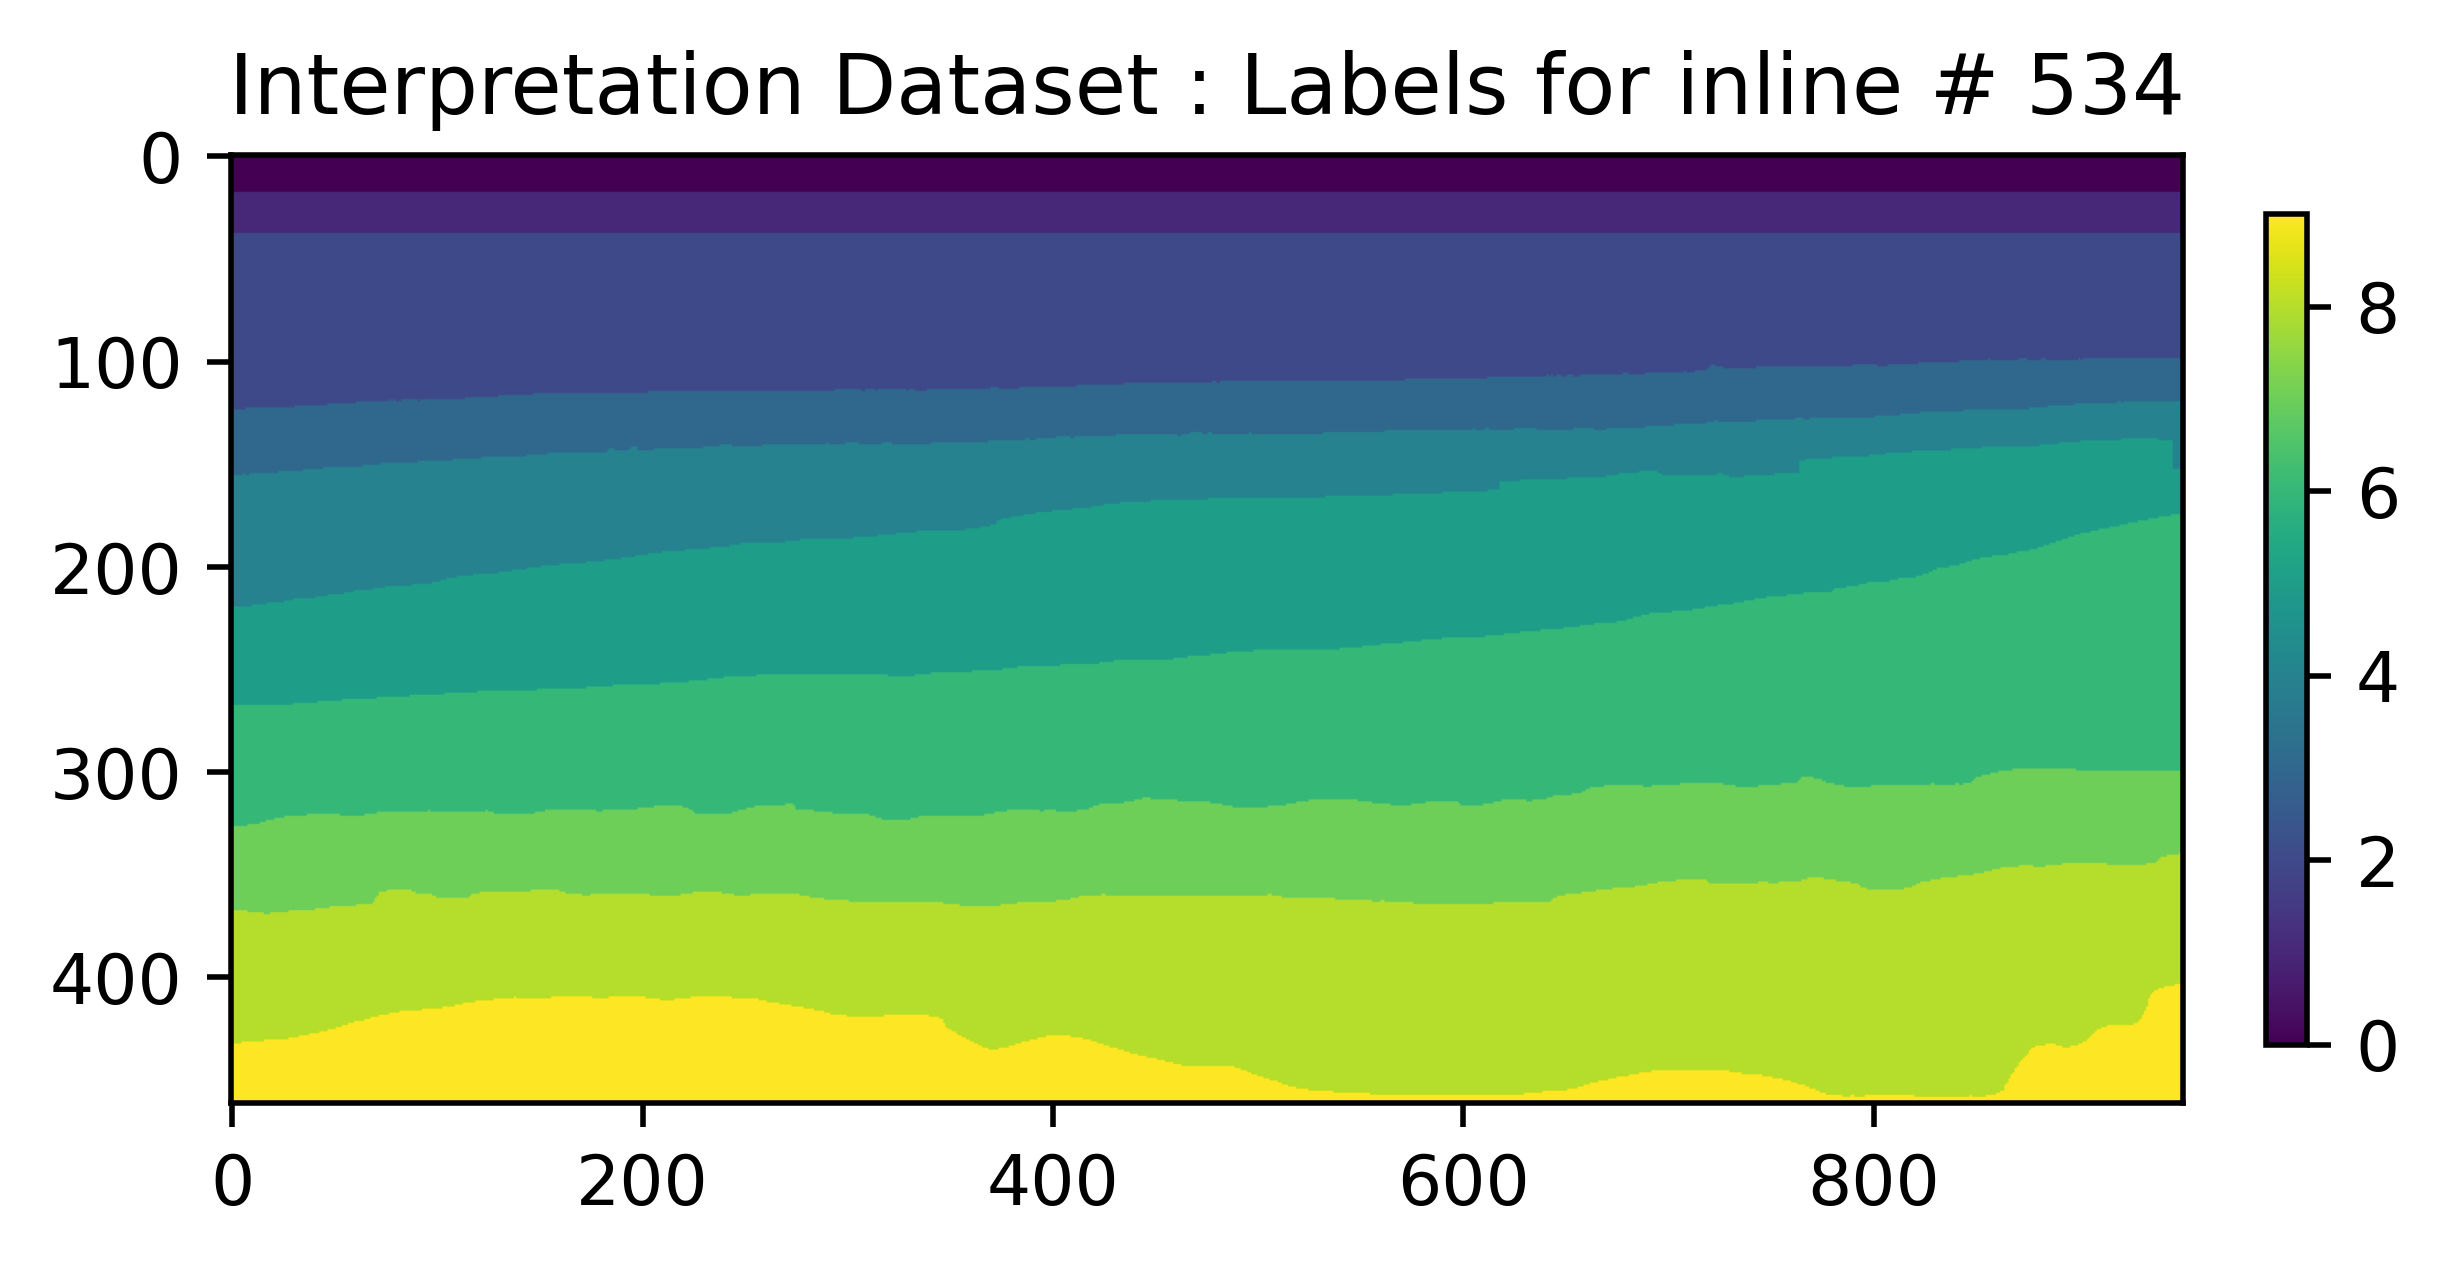

Mask Shape (H x W) : 462 X 951


In [40]:
# inlines with missing values 
args = dict(twt_start = 0,
            twt_end = 100, 
            xline_start = 0, 
            xline_end = 250, 
            figsize=(5,50))

plot_line(inlines_dir,'inline', 534, **args )
plot_mask(masks_dir,'inline',534,**args)

In [41]:
import numpy as np 
log2 = np.log2(19753)
log2

14.269784159747577

========================XLINES========================
XL START : 300, XL END : 1250 -- TOTAL XLINES : 951


/tmp/ipykernel_75228/2253622215.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


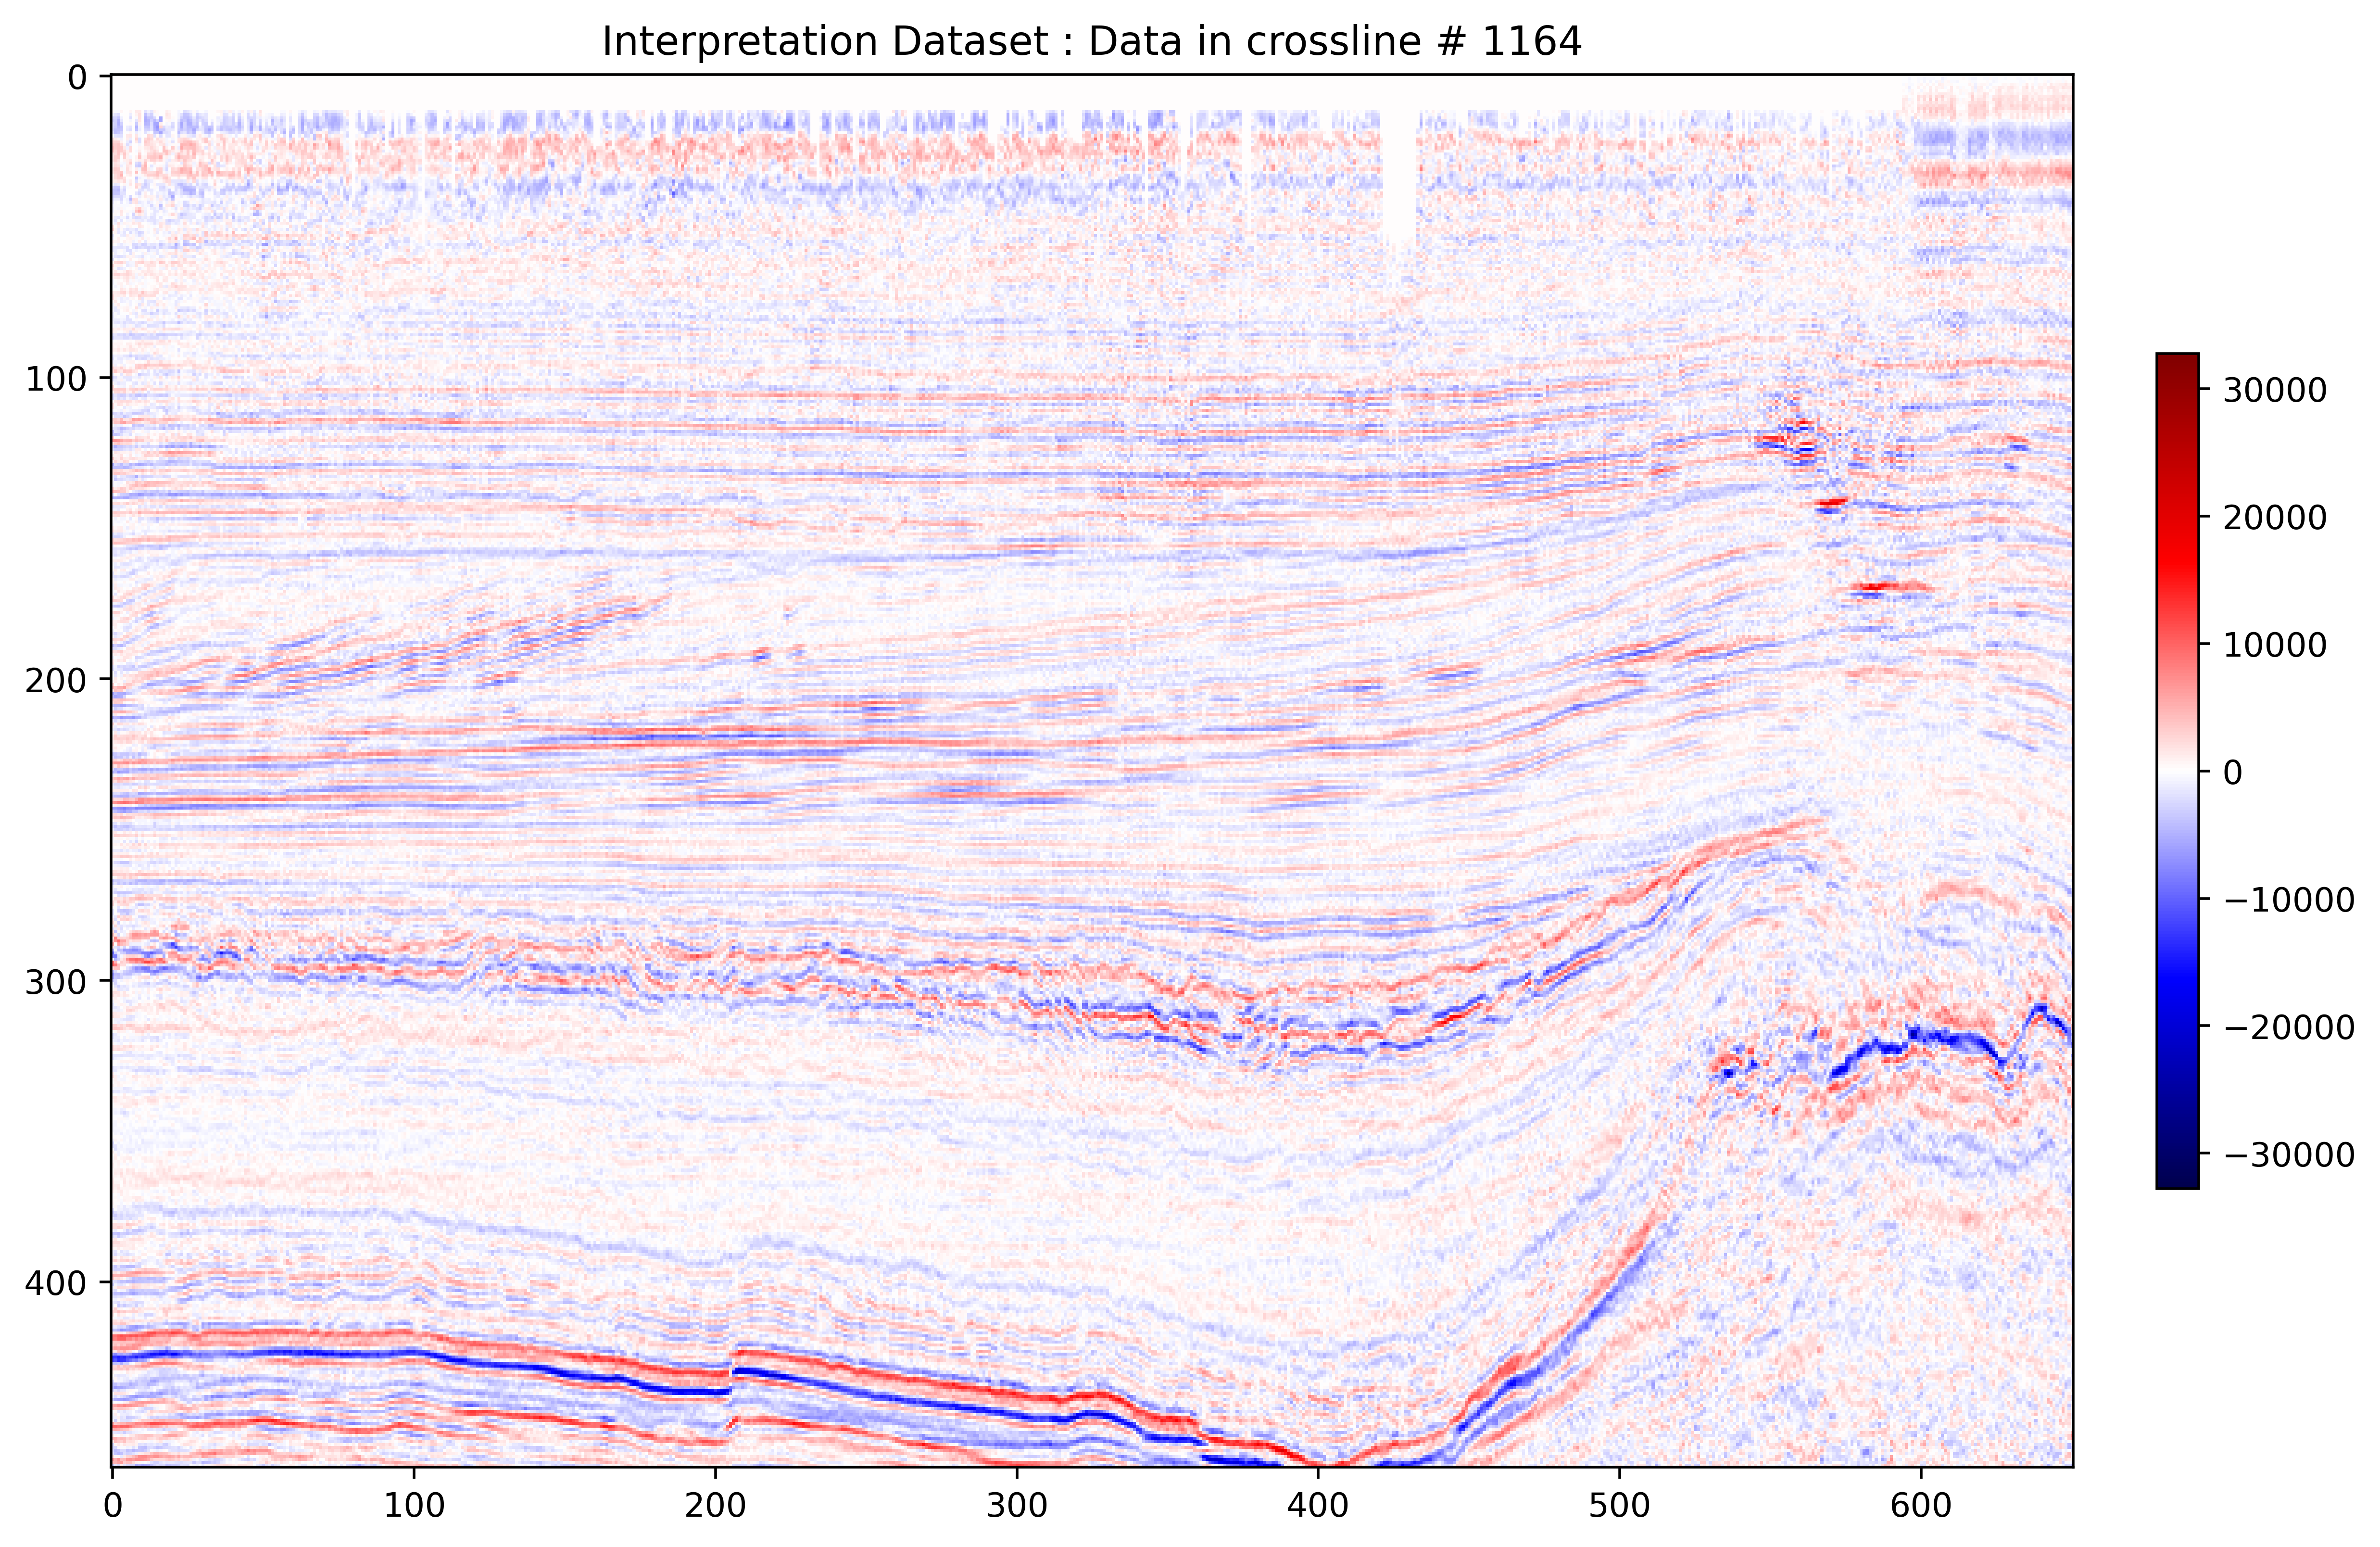

Image Shape (H x W) : 462 X 462
Min Amplitude : -26298.0, Max Amplitude : 20731.0


/tmp/ipykernel_75228/2253622215.py:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


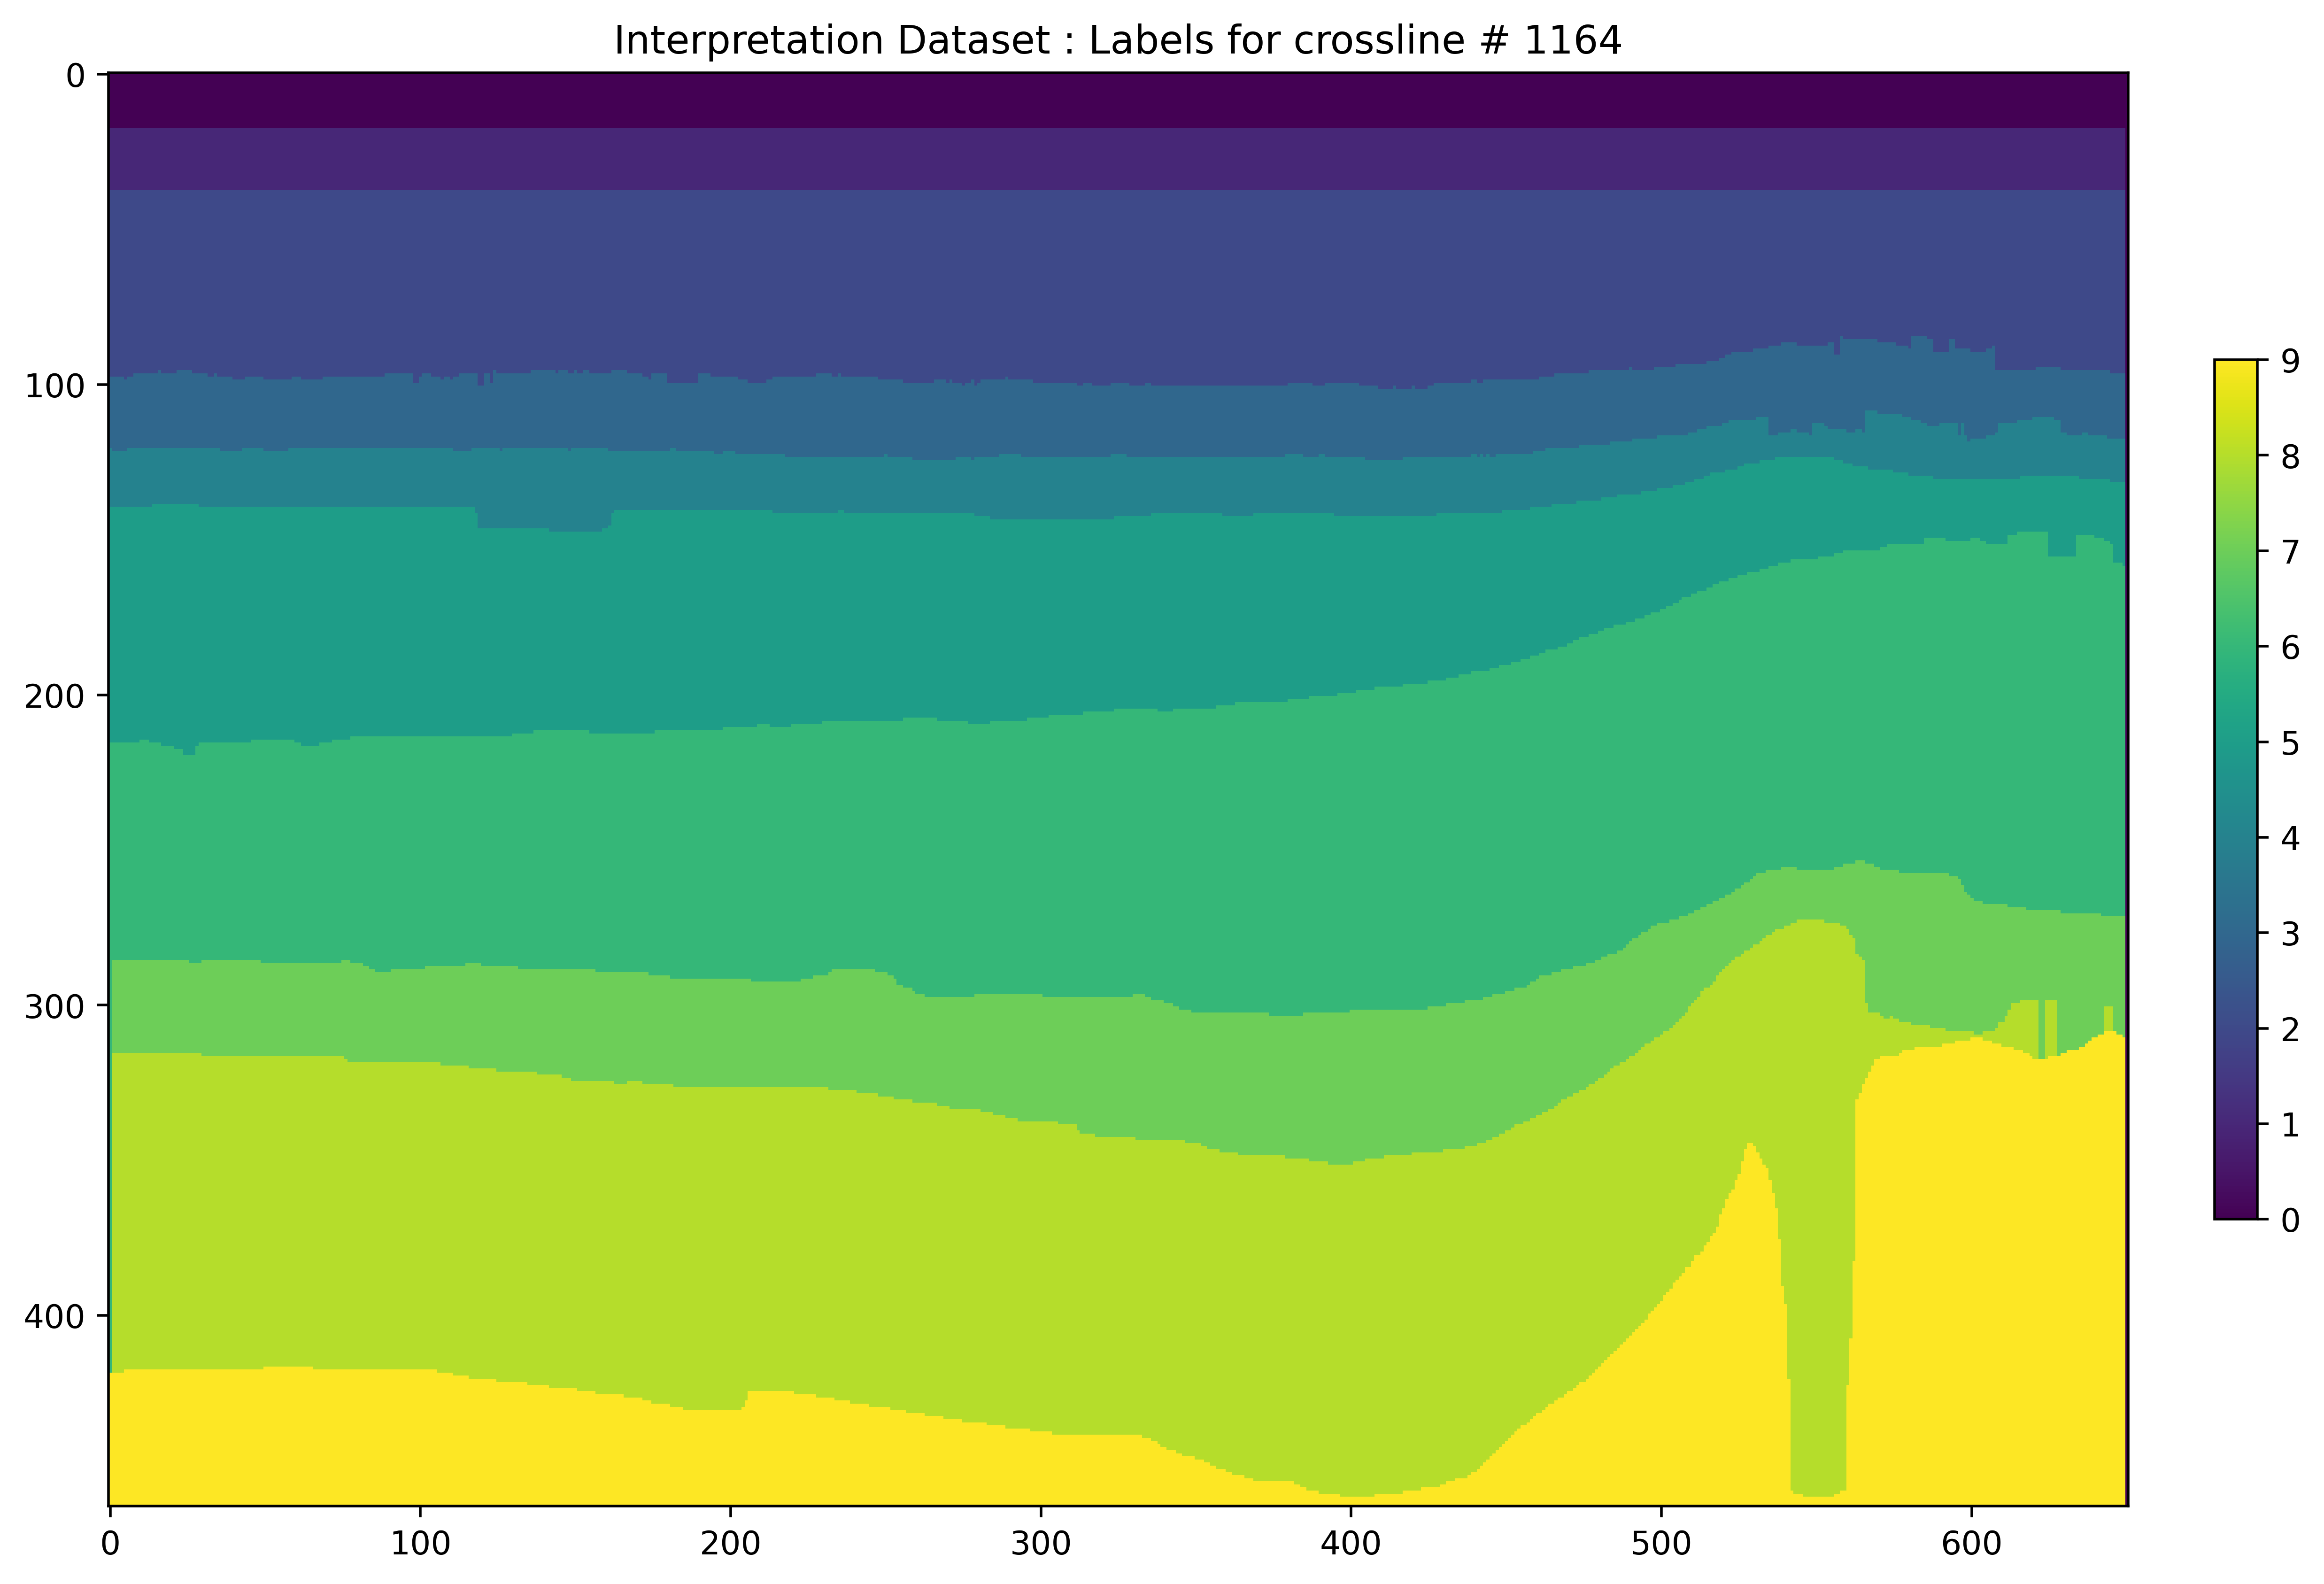

Mask Shape (H x W) : 462 X 651


In [42]:
print("========================XLINES========================")
print(f"XL START : {min_xline}, XL END : {max_xline} -- TOTAL XLINES : {n_xline}")
random_xline_no = np.random.randint(min_xline,max_xline)
plot_line(xlines_dir,'crossline', random_xline_no)
plot_mask(masks_dir,'crossline', random_xline_no )




In [43]:
print("========================HORIZONS======================")
# print(f"Total Horizons : {n_horizons}")

print("========================MASKS========================") 
print(f"Total Masks : {n_masks}")

========================HORIZONS======================
========================MASKS========================
Total Masks : 1602


In [44]:
# sanity checks

# Check if all images and masks are of same size 
for line in range(min_inline, max_inline + 1) : 
    inline_img_path = derive_line_path(inlines_dir, 'inline', line)
    inline_mask_path = derive_mask_path(masks_dir, 'inline', line)

    # print(line)
    assert PIL.Image.open(inline_img_path).height == PIL.Image.open(inline_mask_path).height
    assert PIL.Image.open(inline_img_path).width == PIL.Image.open(inline_mask_path).width

for line in range(min_xline, max_xline + 1) : 
    xline_img_path = derive_line_path(xlines_dir, 'crossline', line)
    xline_mask_path = derive_mask_path(masks_dir, 'crossline', line)

    assert PIL.Image.open(xline_img_path).height == PIL.Image.open(xline_mask_path).height
    assert PIL.Image.open(xline_img_path).width == PIL.Image.open(xline_mask_path).width

# we have all masks
assert n_masks == n_inline + n_xline

In [45]:
# Project Amplitudes
global_max_amp = None 
global_min_amp = None


for path in inline_image_paths : 
    img = PIL.Image.open(path)
    np_img = np.reshape(np.array(img.getdata()), img.size)
    
    if not global_max_amp : 
        global_max_amp = np.max(np_img)
    elif global_max_amp < np.max(np_img) : 
        global_max_amp = np.max(np_img)

    if not global_min_amp : 
        global_min_amp = np.min(np_img)
    elif global_min_amp > np.min(np_img) : 
        global_min_amp = np.min(np_img)

for path in xline_image_paths : 
    img = PIL.Image.open(path)
    np_img = np.reshape(np.array(img.getdata()), img.size)
    
    if not global_max_amp : 
        global_max_amp = np.max(np_img)
    elif global_max_amp < np.max(np_img) : 
        global_max_amp = np.max(np_img)

    if not global_min_amp : 
        global_min_amp = np.min(np_img)
    elif global_min_amp > np.min(np_img) : 
        global_min_amp = np.min(np_img)
    

In [46]:
print(f'''
Global Minimum Amplitude : {global_min_amp}
Global Maximum Amplitude : {global_max_amp}
''')


Global Minimum Amplitude : -32767.0
Global Maximum Amplitude : 32767.0



In [47]:
np.log2(32767)

14.999955971769559

In [48]:
# sample horizon
# with open(horizon_paths[0], 'r') as f : 
#     line = f.readlines(100)
#     print(line)

The horizon file contains x,y,z coordinates of each horizon in the 3d volume.

In [49]:
# Missing values
missing_count = 0 
for path in inline_image_paths : 
    img = PIL.Image.open(path)
    np_img = np.reshape(np.array(img.getdata()), img.size)
    missing_count += np.sum(np.isnan(np_img))

for path in xline_image_paths : 
    img = PIL.Image.open(path)
    np_img = np.reshape(np.array(img.getdata()), img.size)
    missing_count += np.sum(np.isnan(np_img))

for path in mask_paths : 
    img = PIL.Image.open(path)
    np_img = np.reshape(np.array(img.getdata()), img.size)
    missing_count += np.sum(np.isnan(np_img))
    
missing_count 

0

In [50]:
global_max_amp - global_min_amp

65534.0

Each image is a record of reflections from sub surface recorded in time. So the vertical axis represents time and the horizontal axis represents the distance from seismic source.
As the subsurface acts like an absorption medium, the reflections received later have lower amplitudes than earlier. Also the image has lower resolution as the time increases. 

In [51]:
os.path.join(inline_patches_dir, 'labels.json')

'/local1/workspace/adl_seismic/data/interpretation/tiles_inlines/labels.json'

In [52]:
# with open(os.path.join(inline_patches_dir, 'labels.json')) as f : 
#     inline_patch_labels = pd.DataFrame.from_dict(json.load(f),orient='index' ).reset_index()
#     f.close()

# with open(os.path.join(xline_patches_dir, 'labels.json')) as f : 
#     xline_patch_labels = pd.DataFrame.from_dict(json.load(f), orient='index').reset_index()
#     f.close()

In [53]:
# spliting into columns 
# inline_patch_labels.columns =  ['filename', 'label']
# xline_patch_labels.columns =  ['filename', 'label']

# inline_patch_labels['line_type']  = inline_patch_labels['filename'].str.split('.').str[0].str.split('_').str[0]
# inline_patch_labels['line_no']  = inline_patch_labels['filename'].str.split('.').str[0].str.split('_').str[1]
# inline_patch_labels['patch_index'] = inline_patch_labels['filename'].str.split('.').str[0].str.split('_').str[2]


# xline_patch_labels['line_type'] = xline_patch_labels['filename'].str.split('.').str[0].str.split('_').str[0]
# xline_patch_labels['line_no'] = xline_patch_labels['filename'].str.split('.').str[0].str.split('_').str[1]
# xline_patch_labels['patch_index'] = xline_patch_labels['filename'].str.split('.').str[0].str.split('_').str[2]

# patch_labels = pd.concat([inline_patch_labels, xline_patch_labels], ignore_index=True).reindex()

# patch_labels.head()

In [54]:
# cols_to_convert = ['label', 'line_no', 'patch_index']
# for col in cols_to_convert : 
#     patch_labels[col] = patch_labels[col].astype('int')
# patch_labels.info()

In [55]:
# patch_labels = patch_labels.sort_values(['line_type', 'line_no', 'patch_index'], ascending=[True, True, True])
# patch_labels.head()

In [56]:
# patches information 
# patch_labels.info()

In [57]:
# patch_info = patch_labels # do not delete. written for consistency with experiments folder files

In [58]:
# def generate_patch_path(row) : 
#     line_type, filename = row['line_type'], row['filename']
#     folder_path = inline_patches_dir if (line_type == 'inline') else xline_patches_dir
#     return os.path.join(folder_path, filename)

# patch_info['filepath'] = patch_info.apply(generate_patch_path, axis=1)

In [59]:
# patch_info['filepath'].head()

In [60]:
# def patch_average(row) : 
#     # print(row.info())
#     folder = inline_patches_dir if row['line_type'] == 'inline' else xline_patches_dir
#     patch_path = os.path.join(folder, row['filename'] + '.png')
#     mean_amp = None 
#     std_amp = None 
#     with open(patch_path) as f : 
#         img = PIL.Image.open(path)
#         data = img.getdata()
#         mean_amp = np.mean(data)
#         std_amp = np.std(data)
#         f.close()
#     return mean_amp, std_amp

# patch_labels['point_estimates'] = np.nan
# patch_labels['point_estimates'][:100] = patch_labels[:100].apply(patch_average, axis=1)
# patch_labels.head()            

In [61]:
inspect(pd.read_json)

╭──────────────────────────────────── <function read_json at 0x7f1540dcc790> ─────────────────────────────────────╮
│ def read_json(path_or_buf: 'FilePath | ReadBuffer[str] | ReadBuffer[bytes]', orient: 'str | None' = None, typ:  │
│ "Literal['frame', 'series']" = 'frame', dtype: 'DtypeArg | None' = None, convert_axes=None, convert_dates:      │
│ 'bool | list[str]' = True, keep_default_dates: 'bool' = True, numpy: 'bool' = False, precise_float: 'bool' =    │
│ False, date_unit: 'str | None' = None, encoding: 'str | None' = None, encoding_errors: 'str | None' = 'strict', │
│ lines: 'bool' = False, chunksize: 'int | None' = None, compression: 'CompressionOptions' = 'infer', nrows: 'int │
│ | None' = None, storage_options: 'StorageOptions' = None) -> 'DataFrame | Series | JsonReader':                 │
│                                                                                                                 │
│ Convert a JSON string to pandas object.                                                                         │
│                                                                                                                 │
│ 37 attribute(s) not shown. Run inspect(inspect) for options.                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [62]:
#  Plotting a distribution of amplitudes per class 

path = inline_image_paths[0]
img = PIL.Image.open(path)
np_img = np.reshape(np.array(img.getdata()), img.size)

np_mask = np.where(np_img > 0 , 1, -1)
np_img_norm = np_mask * np.abs(np_img) / global_max_amp

print(np.max(np_img_norm), np.min(np_img_norm))

plt.figure(figsize=(20,20))
plt.hist(np.abs(np_img_norm.ravel()), bins = 2**15, range=(-1.0,1.0),fc='k',ec='k')
plt.show()

0.8735923337504197 -0.8984038819544053


In [63]:
np.sum(np.where(np_img_norm == 0 , 1, 0).ravel()) / np.prod(np_img_norm.shape) 

0.04535667627150277

In [64]:
plt.figure(figsize=(20,20))
plt.boxplot(np.abs(np_img_norm.ravel()))
plt.show()

In [65]:

log_img = np.log1p(np.abs(np_img_norm.ravel()))

plt.figure(figsize=(20,20))
plt.boxplot(log_img)
plt.show()

In [66]:
# converting ilines and xlines and their labels into test, val, train npy 


In [67]:
# creating an inline cube 
inline_list = []
volume_npy = None 
n_inline , min_inline, max_inline = len(inline_image_paths) , extract_line_no(inline_image_paths[0]) , extract_line_no(inline_image_paths[-1])

for iline in range(min_inline, max_inline+1) : 
    path = derive_line_path(inlines_dir, 'inline', iline)
    img = imageio.imread(path)
    img = np.array(img)
    inline_list.append(img)
    img = None

volume_npy = np.transpose(np.stack(inline_list, axis = 0 ), (0,2,1))
volume_npy.shape

/tmp/ipykernel_75228/3754026023.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


(651, 951, 462)

In [68]:
# creating inline labels cube 
label_npy = None
mask_list = []
for iline in range(min_inline, max_inline+1) : 
    path = derive_mask_path(masks_dir, 'inline', iline)
    img = imageio.imread(path)
    img = np.array(img)
    mask_list.append(img)
    img = None
    
label_npy = np.transpose(np.stack(mask_list, axis = 0 ), (0,2,1))
label_npy.shape

/tmp/ipykernel_75228/641709333.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


(651, 951, 462)

In [69]:
if loc == 'workstation' : 
    volume_path = '../data/interpretation/inline_vol.npy'
if loc == 'mac' : # mac
    volume_path = '../data/f3_interpretation/inline_vol.npy'

    
np.save(volume_path, volume_npy)

In [70]:
if loc == 'workstation' : 
    label_path = './data/interpretation/inline_label.npy'
if loc == 'mac' : 
    label_path = './data/f3_interpretation/inline_label.npy'

np.save(label_path, label_npy)

FileNotFoundError: [Errno 2] No such file or directory: './data/interpretation/inline_label.npy'

In [ ]:
np.mean(volume_npy) , np.std(volume_npy) , np.min(volume_npy), np.max(volume_npy), np.max(np.abs(volume_npy))

(-2.011462, 2444.979, -32767.0, 32767.0, 32767.0)

In [ ]:
np.median(volume_npy)

0.0

In [ ]:
np.quantile(np.abs(volume_npy), .99)

7914.0